<a href="https://colab.research.google.com/github/BKover99/Pseudovisium/blob/main/pseudovisium_mouse_pup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://s3-us-west-2.amazonaws.com/10x.files/samples/xenium/1.6.0/Xenium_V1_mouse_pup/Xenium_V1_mouse_pup_outs.zip
#!wget https://cf.10xgenomics.com/samples/xenium/1.6.0/Xenium_V1_mouse_pup/Xenium_V1_mouse_pup_he_imagealignment.csv
#!wget https://cf.10xgenomics.com/samples/xenium/1.6.0/Xenium_V1_mouse_pup/Xenium_V1_mouse_pup_he_image.ome.tif

--2024-05-17 22:40:30--  https://s3-us-west-2.amazonaws.com/10x.files/samples/xenium/1.6.0/Xenium_V1_mouse_pup/Xenium_V1_mouse_pup_outs.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.237.216, 52.92.164.248, 52.92.195.128, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.237.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63763679465 (59G) [application/zip]
Saving to: ‘Xenium_V1_mouse_pup_outs.zip’

Xenium_V1_mouse_pup 100%[===================>]  59.38G  26.4MB/s    in 39m 16s 

2024-05-17 23:19:47 (25.8 MB/s) - ‘Xenium_V1_mouse_pup_outs.zip’ saved [63763679465/63763679465]



In [2]:

!unzip /content/Xenium_V1_mouse_pup_outs.zip

Archive:  /content/Xenium_V1_mouse_pup_outs.zip
  inflating: cell_feature_matrix.h5  
 extracting: cell_feature_matrix.zarr.zip  
 extracting: analysis.zarr.zip       
  inflating: cells.csv.gz            
  inflating: cells.parquet           
 extracting: cells.zarr.zip          
  inflating: cell_boundaries.csv.gz  
  inflating: cell_boundaries.parquet  
 extracting: transcripts.zarr.zip    
  inflating: transcripts.csv.gz      
  inflating: transcripts.parquet     
  inflating: morphology.ome.tif      
  inflating: morphology_mip.ome.tif  
  inflating: morphology_focus.ome.tif  
  inflating: nucleus_boundaries.csv.gz  
  inflating: nucleus_boundaries.parquet  
  inflating: analysis_summary.html   
  inflating: experiment.xenium       
  inflating: metrics_summary.csv     
  inflating: gene_panel.json         
  inflating: analysis.tar.gz         
  inflating: cell_feature_matrix.tar.gz  


In [3]:
pip install numpy

In [4]:
pip install pseudovisium

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.6 MB/s

In [5]:
pip install squidpy

In [6]:
pip install imagecodecs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 34.7 MB/s eta 0:00:00


In [8]:
import squidpy as sq
import numpy as np

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


## Running pseudovisium_generate

In [9]:
from Pseudovisium.pseudovisium_generate import generate_pv
csv_file = "/content/transcripts.csv.gz"
output_path = "/content"
hexagon_size = 50
pseudovisium_path = generate_pv(csv_file=csv_file,
                                hexagon_size=hexagon_size,
                                output_path=output_path,
                                  batch_size=20000000,
                                technology="Xenium",
                                max_workers=10,
                                quality_filter=True,
                                quality_per_hexagon=False,
                                quality_per_probe=False,
                                    project_name='mouse')

None
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to False
Quality counting per probe is set to False
Created temporary directory /tmp/tmp_hexaijf2xzau
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Created batch 10
Created batch 11
Created batch 12
Finished preprocessing. Total batches created: 12
Processing batches using 8 processes


Processing batches: 100%|██████████| 12/12 [14:23<00:00, 71.98s/batch]


Creating pseudovisium folder in output path:/content/pseudovisium/mouse
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:771: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


No quality information provided. Skipping quality information files.
No quality information provided. Skipping quality information files.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 191440902.0
Number of unique hexagons: 22521
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Creating blank tissue_hires_image.png and tissue_lowres_image.png files in spatial folder.
Creating arguments.json file in output path.
Time taken: 3490.3337972164154 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.


## Creating anndata object and quick plot showing sum transcript abundance per hexagon

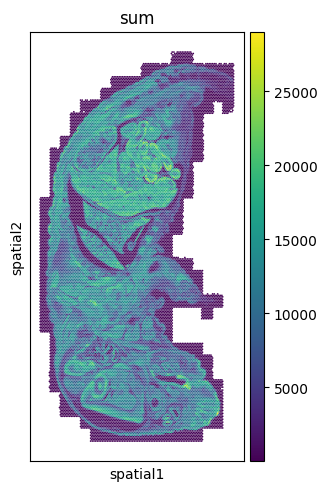

In [10]:
mouse_pup_pv = sq.read.visium("/content/pseudovisium/mouse/", library_id="library_id")
mouse_pup_pv.obs["sum"]= np.array(np.sum(mouse_pup_pv.X,axis=1)).flatten()
sq.pl.spatial_scatter(
    mouse_pup_pv,color="sum",img=False
)

In [11]:
folder = "/content/"
import scanpy as sc
import pandas as pd

adata_fullres = sc.read_10x_h5(
            filename=folder+"/cell_feature_matrix.h5"
        )
df = pd.read_csv(folder+"/cells.csv.gz")
df.set_index(adata_fullres.obs_names, inplace=True)
adata_fullres.obs = df.copy()
adata_fullres.obsm["spatial"] = adata_fullres.obs[["x_centroid", "y_centroid"]].copy().to_numpy()
sc.pp.calculate_qc_metrics(adata_fullres, percent_top=(50, 100, 200, 300), inplace=True)

In [12]:
pip install pympler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 3.5 MB/s eta 0:00:00


In [13]:
from pympler import asizeof


## Size of the full res dataset.

In [14]:
print("Total size of the object:", asizeof.asizeof(adata_fullres)/ (1024 * 1024), "Mb")

Total size of the object: 3428.301803588867 Mb


## Size of the Pseudovisium binned dataset.

In [15]:
print("Total size of the object:", asizeof.asizeof(mouse_pup_pv)/ (1024 * 1024), "Mb")

Total size of the object: 83.5792236328125 Mb
